## Subset growth plate

In [ ]:
#sceasy::convertFormat('scANVI.h5ad', from="anndata", to="seurat",
#                       outFile='scANVI.Rds')

In [ ]:
Atlas <- readRDS('scANVI.Rds')

In [5]:
Idents(Atlas) <- Atlas@meta.data$CellType

In [6]:
GP <- subset(Atlas, idents=c('Resting zone chondrocytes','Proliferative chondrocytes','Pre-hypertrophic chondrocytes','Hypertrophic chondrocytes'))

In [7]:
GP$CellType <- droplevels.factor(GP$CellType)

In [8]:
head(GP$CellType)

BSC_1_AAACCTGGTCAACATC-1_1 BSC_1_AAACGGGTCAACACCA-1_1 
 Resting zone chondrocytes Proliferative chondrocytes 
BSC_1_AAAGATGAGCTGTTCA-1_1 BSC_1_AAAGCAAAGCTAAACA-1_1 
 Resting zone chondrocytes Proliferative chondrocytes 
BSC_1_AAAGCAACAGGGAGAG-1_1 BSC_1_AAATGCCAGGCACATG-1_1 
 Resting zone chondrocytes Proliferative chondrocytes 
4 Levels: Pre-hypertrophic chondrocytes ... Proliferative chondrocytes

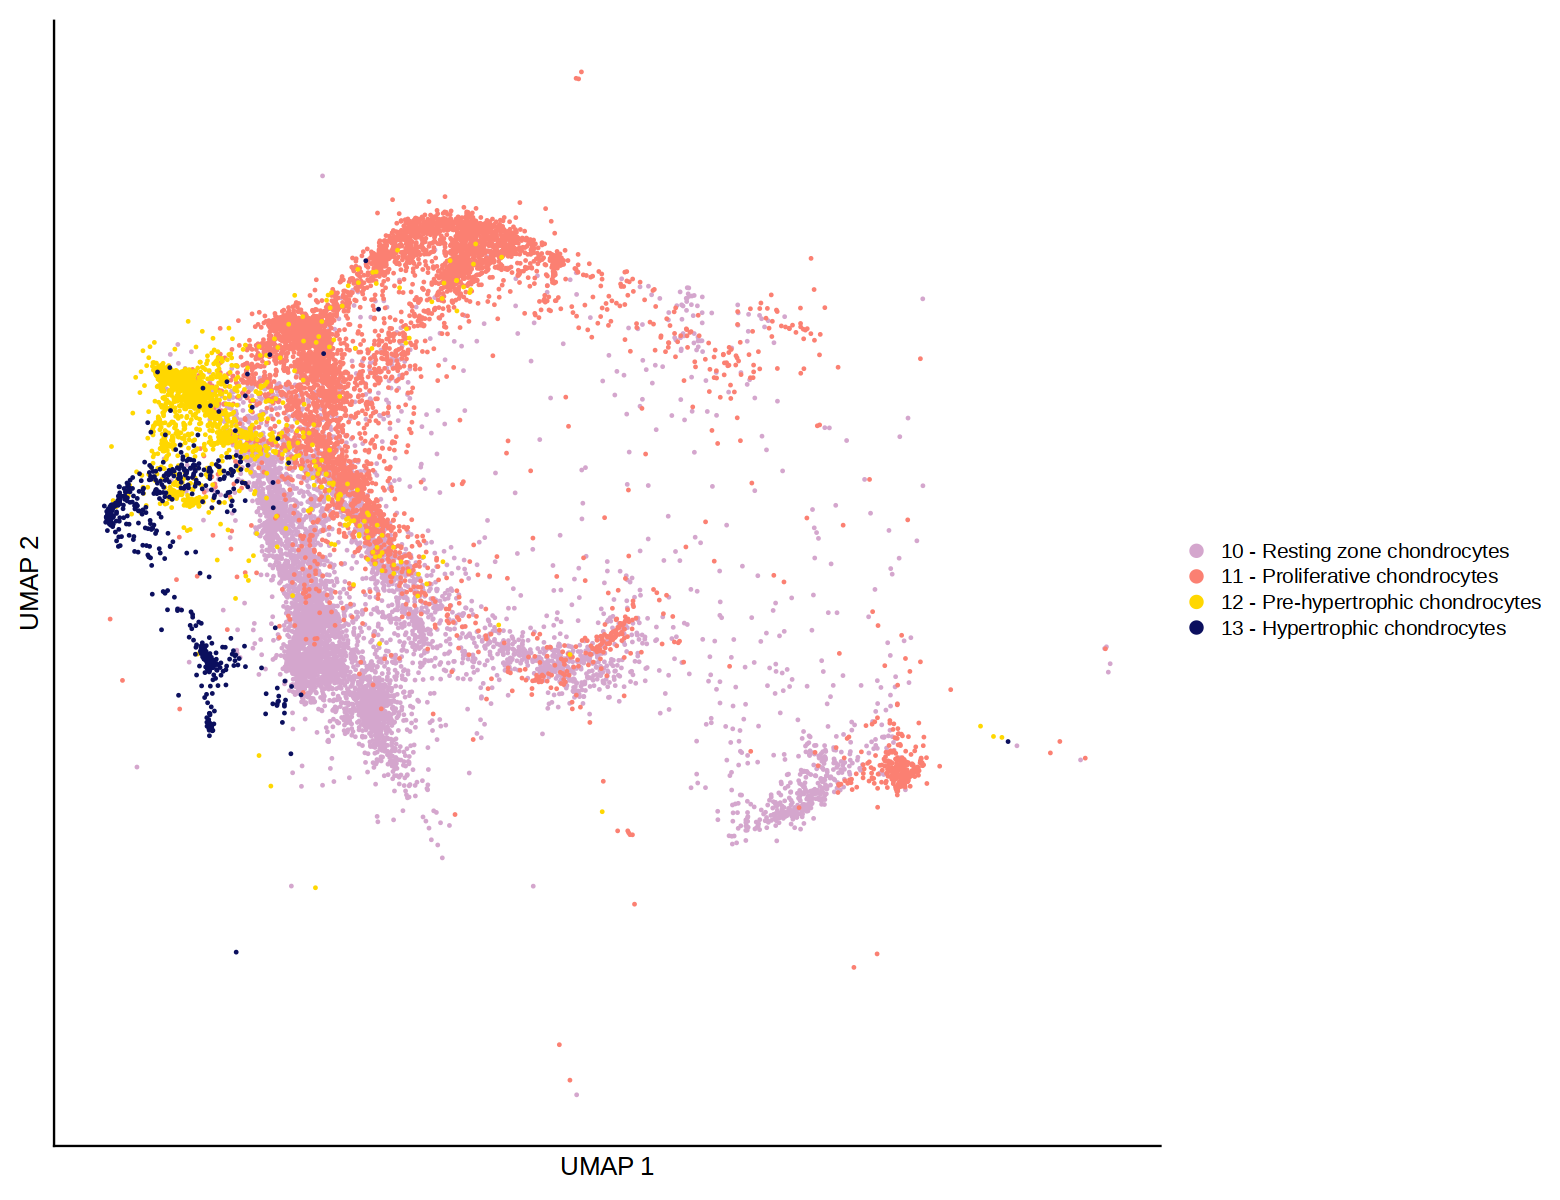

In [39]:
options(repr.plot.width = 13, repr.plot.height = 10)
p1 <- DimPlot(GP, group.by='NandC',reduction = "mde_scanvi",order = c('42 - TBD', '41 - Embryonic skin', '40 - Neurons', '39 - Platelets', '38 - Erythroid cells', '37 - Immune cells', '36 - AER', '35 - Lymphatic endothelial cells', '34 - Vascular endothelial cells', '33 - Smooth muscle cells', '32 - Skeletal muscle cells', '31 - Muscle progenitors', '30 - Myogenic stem cells', '29 - Fibroblasts', '28 - Adipocytes', '27 - Osteoclasts', '26 - Periosteum', '25 - Periosteal progenitors', '24 - Periosteal stem cells', '23 - Osteocytes', '22 - Fast proliferating osteoblasts', '21 - Osteoblasts', '20 - Osteoprogenitors', '19 - Synovial fibroblasts', '18 - Tenocytes', '17 - Tenocyte precursors', '16 - Interzone cells', '15 - Joint precursors', '14 - Articular chondrocytes', '13 - Hypertrophic chondrocytes', '12 - Pre-hypertrophic chondrocytes', '11 - Proliferative chondrocytes', '10 - Resting zone chondrocytes', '9 - Chondroprogenitors', '8 - SSPCs', '7 - Fast proliferating cells', '6 - ZPA', '5 - Distal limb bud mesenchyme', '4 - Intermediate limb bud mesenchyme', '3 - Proximal limb bud mesenchyme', '2 - LepR+ BMSCs', '1 - BMSCs')
, pt.size = 0.3, label = F , label.size=6 ,label.color = 'black', repel=TRUE, raster=FALSE, cols= c('1 - BMSCs'='#66C2A5',
'2 - LepR + BMSCs'='#F781BF',
'3 - Proximal limb bud mesenchyme'='#B3DE69',
'4 - Intermediate limb bud mesenchyme'='#8DA0CB',
'5 - Distal limb bud mesenchyme'='#949086',
'6 - ZPA'='#FFCCCB',
'7 - Fast proliferating cells'='#666666',
'8 - SSPCs'='#B3B3B3',
'9 - Chondroprogenitors'='#8DD3C7',
'10 - Resting zone chondrocytes'='#D4A6CD',
'11 - Proliferative chondrocytes'='#FB8072',
'12 - Pre-hypertrophic chondrocytes'='#FFD700',
'13 - Hypertrophic chondrocytes'='#0B0F5E',
'14 - Articular chondrocytes'='#377EB8',
'15 - Joint precursors'='#FDB462',
'16 - Interzone cells'='#DD2400',
'17 - Tenocyte precursors'='#FFFF33',
'18 - Tenocytes'='#A65628',
'19 - Synovial fibroblasts'='#FF7F50',
'20 - Osteoprogenitors'='#90EE90',
'21 - Osteoblasts'='#003e00',
'22 - Fast proliferating osteoblasts'='#FFD92F',
'23 - Osteocytes'='#FF7F00',
'24 - Periosteal stem cells'='#502c49',
'25 - Periosteal progenitors'='#A6D854',
'26 - Periosteum'='#B3B3B3',
'27 - Osteoclasts'='#5E885e',
'28 - Adipocytes'='#961900',
'29 - Fibroblasts'='#F845a3',
'30 - Myogenic stem cells'='#8DA0CB',
'31 - Muscle progenitors'='#7e18c6',
'32 - Skeletal muscle cells'='#B0D30A',
'33 - Smooth muscle cells'='#640738',
'34 - Vascular endothelial cells'='#A2CFFE',
'35 - Lymphatic endothelial cells'='#66C2A5',
'36 - AER'='#D4A6CD',
'37 - Immune cells'='#B15928',
'38 - Erythroid cells'='#A0d4a4',
'39 - Platelets'='#8B4513',
'40 - Neurons'='#1F78B4',
'41 - Embryonic skin'='#4B0082',
'42 - TBD'='#AD8530')) +
        xlab("UMAP 1") + ylab("UMAP 2") +
        theme(axis.title = element_text(size = 15)) +
        theme(plot.title = element_blank()) +
        theme(axis.text.x = element_blank(),
              axis.ticks.x = element_blank(),
              axis.text.y = element_blank(),
              axis.ticks.y = element_blank())    

p1 

In [ ]:
ggsave(file="GP_mde_scanvi.svg", width=10, height=10)

In [ ]:
GP@reductions$UMAP <- GP@reductions$mde

In [ ]:
cds <- as.cell_data_set(GP)

In [ ]:
plot_cells(cds, label_groups_by_cluster=FALSE,  color_cells_by = "CellType", reduction_method = 'UMAP')

In [ ]:
cds <- cluster_cells(cds)

In [ ]:
cds <- learn_graph(cds)

In [ ]:
plot_cells(cds, color_cells_by = "CellType",label_groups_by_cluster=FALSE,label_leaves=FALSE, label_branch_points=FALSE)


In [ ]:
cds <- order_cells(cds)


In [ ]:
saveRDS(cds, 'cds_GP.Rds')

In [9]:
cds <- readRDS('cds_GP.Rds')

In [10]:
cds

Loading required package: monocle3


Attaching package: ‘monocle3’


The following objects are masked from ‘package:Biobase’:

    exprs, fData, fData<-, pData, pData<-




In [11]:
GP@meta.data$pseudotime <- pseudotime(cds, reduction_method = "UMAP")


Warning message:
“Some of the plotted features are from meta.data slot.
• Please check that `na_cutoff` param is being set appropriately for those features.”


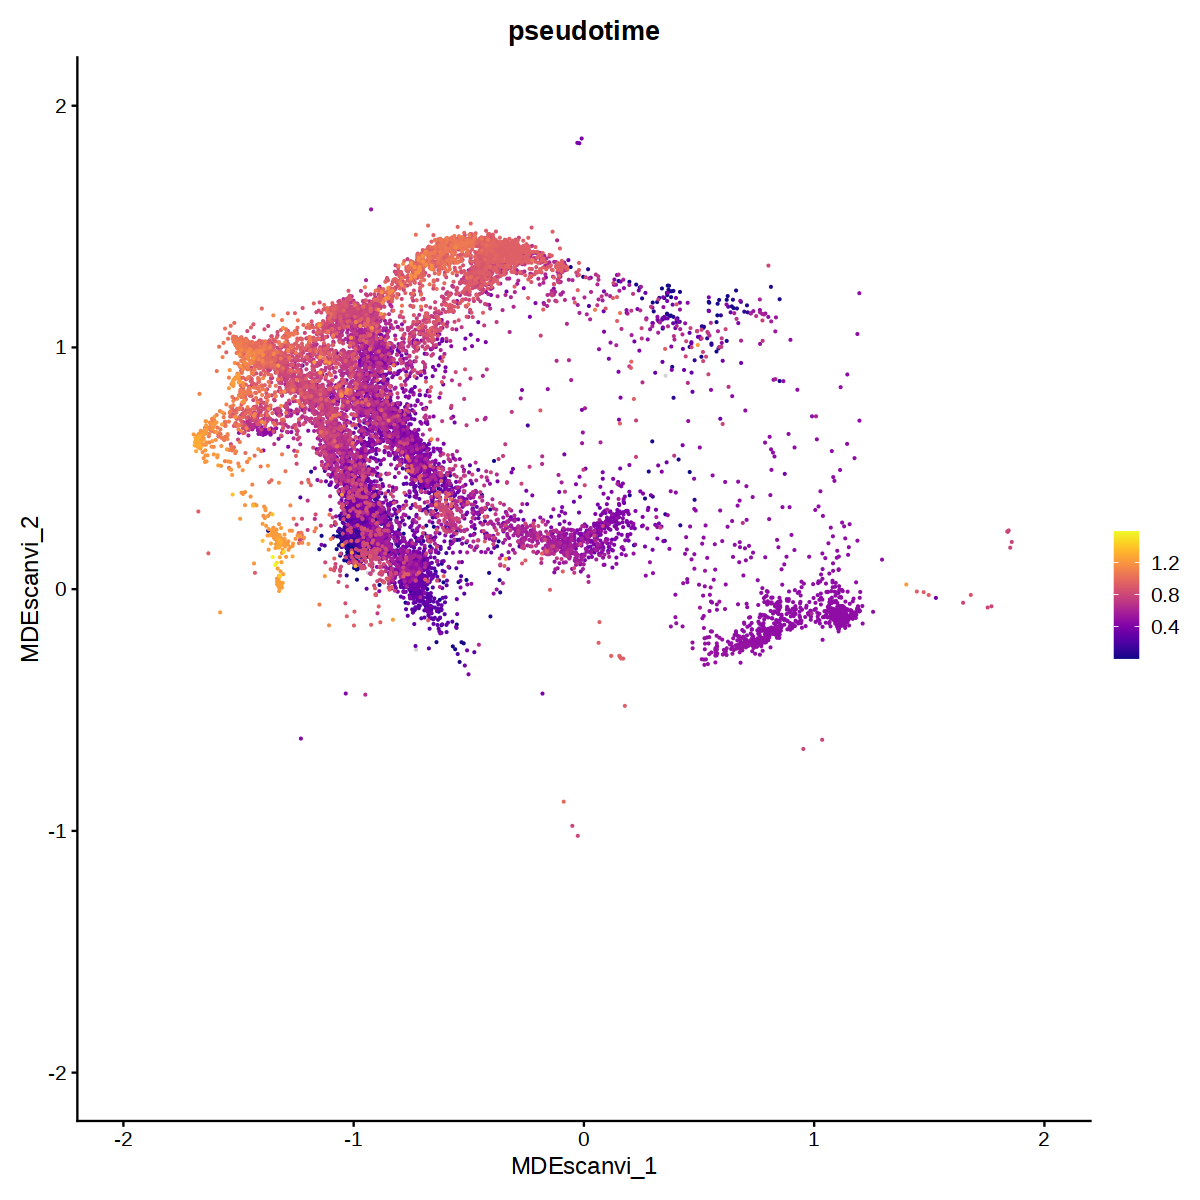

In [15]:
options(repr.plot.width = 10, repr.plot.height = 10)
FeaturePlot_scCustom(seurat_object = GP, reduction = 'mde_scanvi',colors_use = viridis_plasma_light_high, features = "pseudotime")

In [16]:
ggsave(file="pseudo.svg", width=10, height=10)

In [17]:
GP@reductions$UMAP <- GP@reductions$mde

In [46]:
#sceasy::convertFormat(GP, from="seurat", to="anndata",
#                       outFile='GP.h5ad')

Warning message in .regularise_df(Seurat::GetAssay(obj, assay = assay)@meta.features, :
“Dropping single category variables:highly.variable”


AnnData object with n_obs × n_vars = 15096 × 5000
    obs: 'nCount_RNA', 'nFeature_RNA', 'Strain', 'Sex', 'Tissue', 'Technology', 'Author', 'CellType', 'Study', 'Batch', 'DevTP', '_scvi_batch', '_scvi_labels', 'NandC', 'Numbers', 'pseudotime'
    var: 'name', 'mvp.mean', 'mvp.dispersion', 'mvp.dispersion.scaled', 'highly.variable_nbatches', 'highly.variable_intersection'
    obsm: 'X_mde', 'X_mde_scanvi', 'X_pca', 'X_scanvi', 'X_scvi', 'X_umap'